In [2]:
import itertools
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as plt#ticker
from sklearn import preprocessing
%matplotlib inline

In [3]:
df = pd.read_csv('accident_data.csv')
df.head()

C:\Users\Sony_Owner\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [4]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001688ED88>,
      dtype=object)

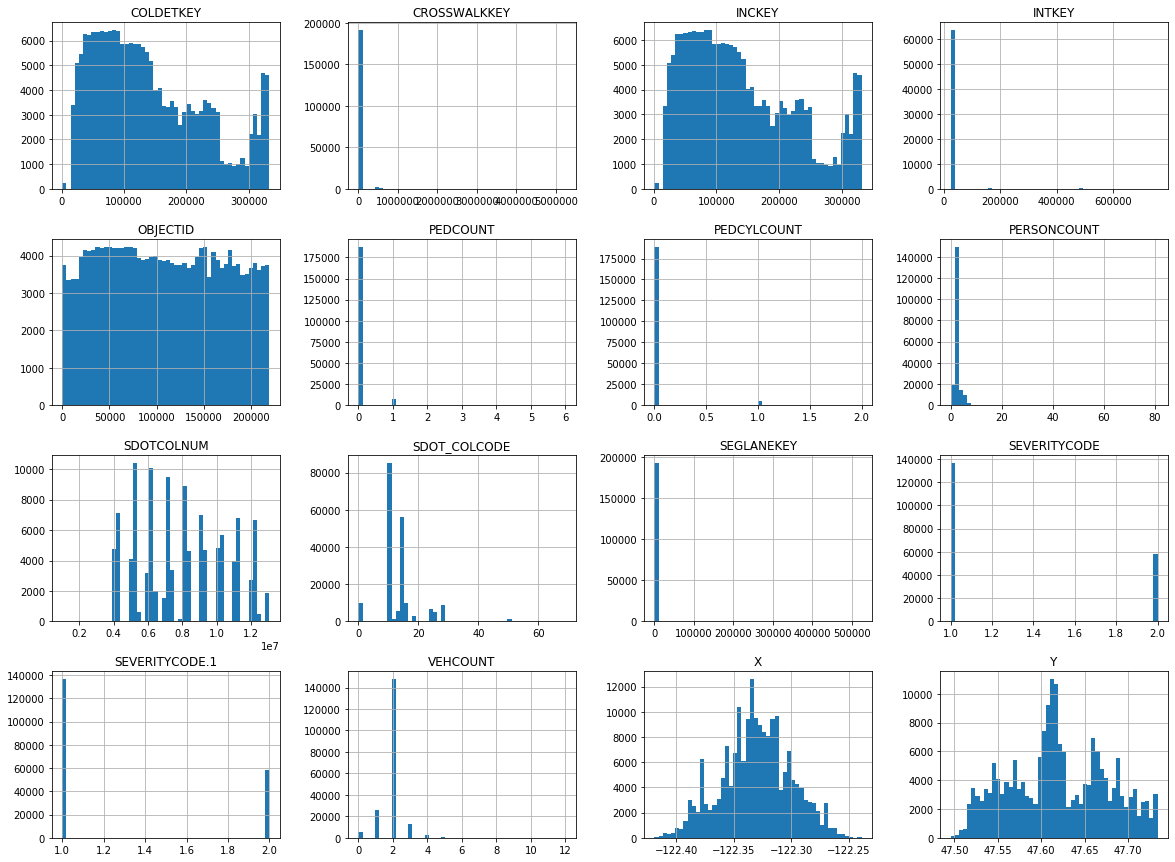

In [5]:
df.hist(bins=50, figsize=(20,15))

In [101]:
null_no = df.isnull().sum()
null_no[null_no>0]#.plot('bar', figsize=(30,10))

X                   5334
Y                   5334
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
COLLISIONTYPE       4904
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
dtype: int64

In [102]:
# Drop all columns with no predictive value for the context of this project
finData = df.drop(columns = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY', 
              'X', 'Y', 'STATUS','ADDRTYPE',
              'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
              'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE',
              'INCDTTM',  'SDOT_COLCODE',
              'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
              'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
              'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDCOUNT', 'PEDCYLCOUNT',
              'PERSONCOUNT', 'VEHCOUNT', 
              'SPEEDING', 'UNDERINFL', 'INATTENTIONIND'])

# Label Encoding
# Convert column to category
finData["WEATHER"] = finData["WEATHER"].astype('category')
finData["ROADCOND"] = finData["ROADCOND"].astype('category')
finData["LIGHTCOND"] = finData["LIGHTCOND"].astype('category')
finData["JUNCTIONTYPE"] = finData["JUNCTIONTYPE"].astype('category')
finData["COLLISIONTYPE"] = finData["COLLISIONTYPE"].astype('category')

# Assign variable to new column for analysis
finData["WEATHER_CAT"] = finData["WEATHER"].cat.codes
finData["ROADCOND_CAT"] = finData["ROADCOND"].cat.codes
finData["LIGHTCOND_CAT"] = finData["LIGHTCOND"].cat.codes
finData["JUNCTION_CAT"] = finData["JUNCTIONTYPE"].cat.codes
finData["COLLISION_CAT"] = finData["COLLISIONTYPE"].cat.codes

finData.head(5)

,SEVERITYCODE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT,JUNCTION_CAT,COLLISION_CAT
0,2,Angles,At Intersection (intersection related),Overcast,Wet,Daylight,4,8,5,1,0
1,1,Sideswipe,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,6,8,2,4,9
2,1,Parked Car,Mid-Block (not related to intersection),Overcast,Dry,Daylight,4,0,5,4,5
3,1,Other,Mid-Block (not related to intersection),Clear,Dry,Daylight,1,0,5,4,4
4,2,Angles,At Intersection (intersection related),Raining,Wet,Daylight,6,8,5,1,0


In [103]:
finData.dtypes

SEVERITYCODE        int64
COLLISIONTYPE    category
JUNCTIONTYPE     category
WEATHER          category
ROADCOND         category
LIGHTCOND        category
WEATHER_CAT          int8
ROADCOND_CAT         int8
LIGHTCOND_CAT        int8
JUNCTION_CAT         int8
COLLISION_CAT        int8
dtype: object

In [104]:
finData["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [105]:
finData["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [106]:
finData["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [107]:
finData["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [108]:
finData["JUNCTIONTYPE"].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [109]:
finData["COLLISIONTYPE"].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [45]:
from sklearn.utils import resample

In [111]:
# Seperate majority and minority classes
finData_majority = finData[colData.SEVERITYCODE==1]
finData_minority = finData[colData.SEVERITYCODE==2]

#Downsample majority class
finData_majority_downsampled = resample(finData_majority,
                                        replace=False,
                                        n_samples=58188,      
                                        random_state=123)

# Combine minority class with downsampled majority class
finData_balance= pd.concat([finData_majority_downsampled, finData_minority])

# Display new class counts
finData_balance.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [112]:
X = np.asarray(finData_balance[['WEATHER_CAT', 'ROADCOND_CAT', 'LIGHTCOND_CAT', 'JUNCTION_CAT','COLLISION_CAT' ]])
X[0:5]

array([[ 6,  8,  2,  1,  0],
       [ 1,  0,  5,  1,  0],
       [10,  7,  8,  1,  0],
       [ 1,  0,  5,  4,  9],
       [ 1,  0,  5,  4,  2]], dtype=int8)

In [113]:
y = np.asarray(finData_balanced['SEVERITYCODE'])
y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [114]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.15236718,  1.52797946, -1.21648407, -1.01700712, -1.44374641],
       [-0.67488   , -0.67084969,  0.42978835, -1.01700712, -1.44374641],
       [ 2.61416492,  1.25312582,  2.07606076, -1.01700712, -1.44374641],
       [-0.67488   , -0.67084969,  0.42978835,  1.00558281,  1.63235664],
       [-0.67488   , -0.67084969,  0.42978835,  1.00558281, -0.76016795]])

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (93100, 5) (93100,)
Test set: (23276, 5) (23276,)


In [116]:
# Building the KNN Model
from sklearn.neighbors import KNeighborsClassifier
k = 25

In [117]:
#Train Model & Predict  
neighbors = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neighbors
Kyhat = neighbors.predict(X_test)
Kyhat[0:10]

array([1, 1, 2, 2, 1, 1, 1, 2, 1, 1], dtype=int64)

In [118]:
# Building the LR Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LReg = LogisticRegression(C=6, solver='liblinear').fit(X_train,y_train)
LReg

LogisticRegression(C=6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
# Train Model & Predicr
LRyhat = LReg.predict(X_test)
LRyhat

array([2, 1, 1, ..., 1, 2, 1], dtype=int64)

In [120]:
yhat_prob = LReg.predict_proba(X_test)
yhat_prob

array([[0.42125011, 0.57874989],
       [0.60923405, 0.39076595],
       [0.56050967, 0.43949033],
       ...,
       [0.5733667 , 0.4266333 ],
       [0.36145587, 0.63854413],
       [0.51317394, 0.48682606]])

In [121]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [122]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, Kyhat)

C:\Users\Sony_Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.6941914418284929

In [123]:
# F1-SCORE
f1_score(y_test, Kyhat, average='macro')

0.6934664147593037

In [124]:
# Jaccard Similarity Score
jaccard_similarity_score(y_test, LRyhat)

C:\Users\Sony_Owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.5849802371541502

In [125]:
# F1-SCORE
f1_score(y_test, LRyhat, average='macro')

0.5844022796459374

In [126]:
# LOGLOSS
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.6731834315014525